# Student Performance Indicator

**Life Cycle of a Machine Learning Project**

1. **Understanding the Problem Statement**
   - Clearly define the problem you are trying to solve.
   - Identify the goals and objectives of the project.
   - Understand the business context and the importance of the problem.

2. **Data Collection**
   - Gather data from various sources.
   - Ensure data quality and relevance.
   - Store data in a structured format.

3. **Exploratory Data Analysis**
   - Analyze the data to understand its structure and main characteristics.
   - Identify patterns, trends, and anomalies.
   - Visualize the data using plots and charts.

4. **Data Pre-Processing**
   - Clean the data by handling missing values and outliers.
   - Transform and normalize the data.
   - Feature engineering: create new features from existing data.

5. **Model Training**
   - Select appropriate machine learning algorithms.
   - Split the data into training and testing sets.
   - Train the models on the training data.

6. **Choose Best Model**
   - Evaluate the models using performance metrics.
   - Compare the models and select the best one.
   - Tune the hyperparameters of the selected model for optimal performance.


1. **Understanding the Problem Statement**
   - This project aims to understand how student performance (test scores) is affected by various factors such as:
     - Gender
     - Ethnicity
     - Parental level of education
     - Lunch type
     - Test preparation course completion

2. **Data Collection**
   -Dataset Sources -https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
   -the data consist 8 columns and 1000 rows

   2.1 **Import Data and Required Packages**
      - Pandas,numpy,seaborn, and wearing library

  



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import the csv data as pandas Data frame

In [3]:
df=pd.read_csv("data/stud.csv.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


2.2 Dataset information

  - writing score-gender:sex of students ->(Male/female)

  -  race/ethnicity :ethenicity of students -(Group A,B,C,D,E)

  - parental level of education :parents final education ->(Bachelor,degree,associate degree,high school,masters etc)

  - lunch:having lunch before test(standard or free/reduced)

  - test preperation course:complete or not before test

  - math score

  - reading score

3.**Data Checks to perform**  

  - Check missing values
  - check duplicates
   - check the number unique values in each column
  - check Data type
  - Check the statistics of Data set
  - check various categories present in the differnt categorical column

  
  
3.1 **Check Missing values**


In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values in data set

3.2**Check duplicates**

In [8]:
df.duplicated().sum()

0

There is no duplicates in data set

3.3 **Check data types**


In [9]:
#check Null And Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 **checking the number of unique values in column**

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 **Check statistics of data set**

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights
- description of numerical data all mean values of numerical data are very close to each other
- all std are also very close to each other
- min score 0-> Math,17->reading,10->writing score. 

3.7 **Exploring Data**

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
print("categories  'gender' variable:  ",end="")
print(df['gender'].unique())

print("categories in 'race/ ethenicity' variable:  ",end=' ')
print(df['race/ethnicity'].unique())

print("categories in 'lunch' variable:  ",end=' ')
print(df['lunch'].unique())

print("categories in 'parental level of education' variable:  ",end=' ')
print(df['parental level of education'].unique())


print("categories in 'test preparation course' variable:  ",end=' ')
print(df['test preparation course'].unique())



categories  'gender' variable:  ['female' 'male']
categories in 'race/ ethenicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'lunch' variable:   ['standard' 'free/reduced']
categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'test preparation course' variable:   ['none' 'completed']


In [30]:
# Define numerical and categorical columns
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O'] #we should have capital O here to select object
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print("We have {} numerical features: {}".format(len(numeric_feature), numeric_feature))
print("\nWe have {} categorical features: {}".format(len(categorical_feature), categorical_feature))

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 **Adding Columns "Total Score" and " average"**

In [34]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [37]:
df['total score']=df['math score'] + df['reading score'] + df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [43]:
reading_100=df[df['reading score']==100]['average'].count()
math_100=df[df['math score']==100]['average'].count()
wrinting_100=df[df['writing score']==100]['average'].count()

print(f"Number of students with full marks in reading: {reading_100}")
print(f"Number of students with full marks in math: {math_100}")
print(f"Number of students with full marks in reading: {wrinting_100}")

Number of students with full marks in reading: 17
Number of students with full marks in math: 7
Number of students with full marks in reading: 14


In [44]:
reading_less_20=df[df['reading score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()
wrinting_less_20=df[df['writing score']<=20]['average'].count()

print(f"Number of students with full marks in reading: {reading_less_20}")
print(f"Number of students with full marks in math: {reading_less_20}")
print(f"Number of students with full marks in reading: {reading_less_20}")

Number of students with full marks in reading: 1
Number of students with full marks in math: 1
Number of students with full marks in reading: 1


insights
 - from the above observation students have performed worst in maths
 - Best performance in Reading Section
 

4 **Exploring Data Visualisation**

  4.1 **Visualise average score destribution to make more conclusion**
  - Histogram
  - Kernel Destribution (KDE)

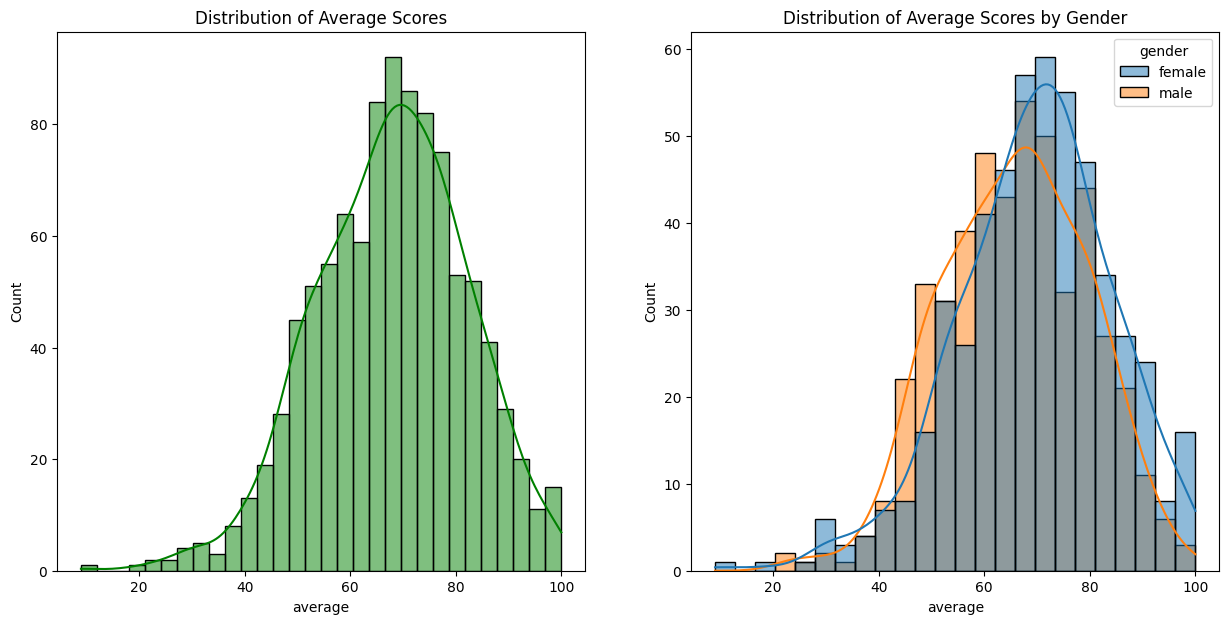

In [64]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Second subplot
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution of Average Scores by Gender')

# Show plot
plt.show()

insights

- Females are performing better then boys

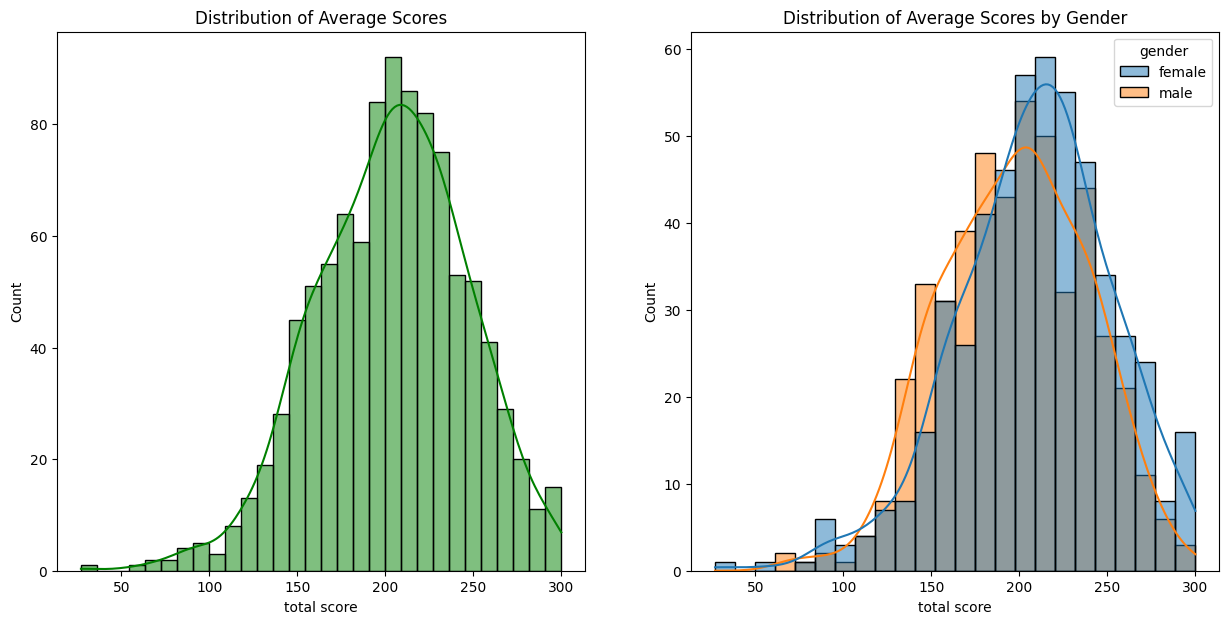

In [73]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Second subplot
sns.histplot(data=df, x='total score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution of Average Scores by Gender')
plt.show()

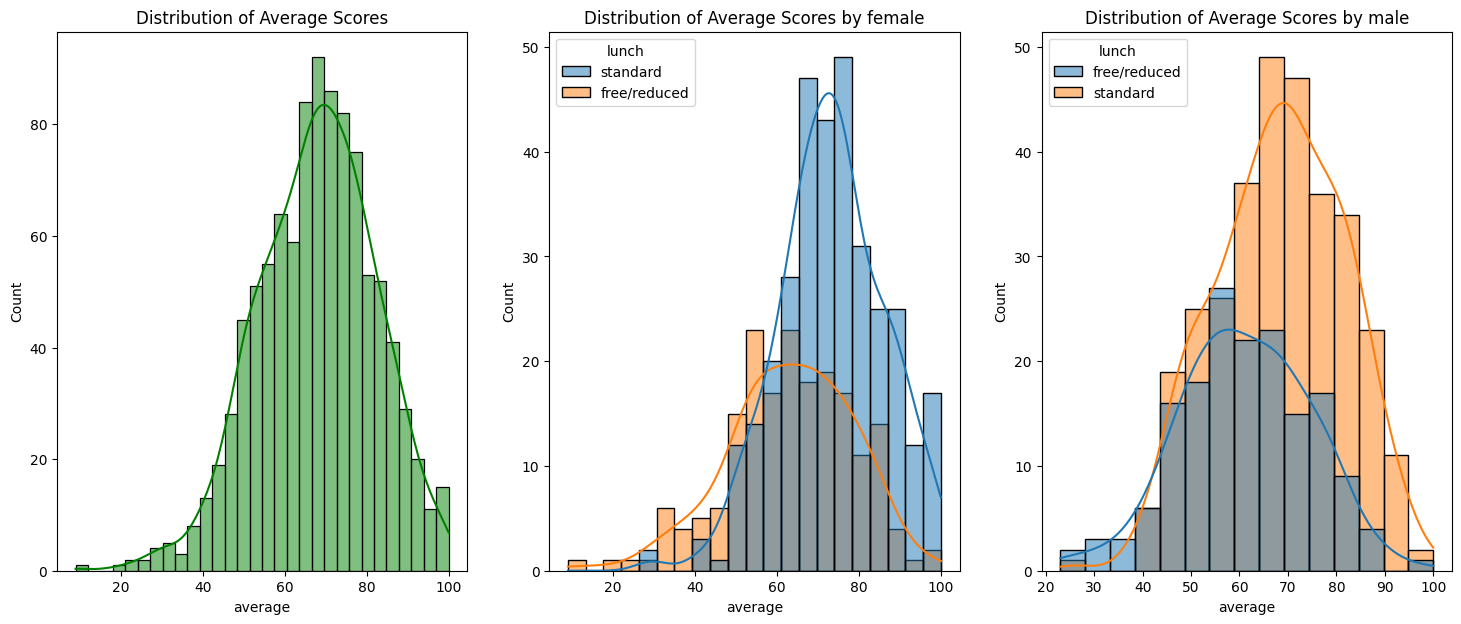

In [72]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

# First subplot
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Second subplot
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Distribution of Average Scores by female')

sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Distribution of Average Scores by male')
plt.show()

insights
- standard lunch helps to perform well in exam for both male and femalem

In [74]:
df.head(0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average


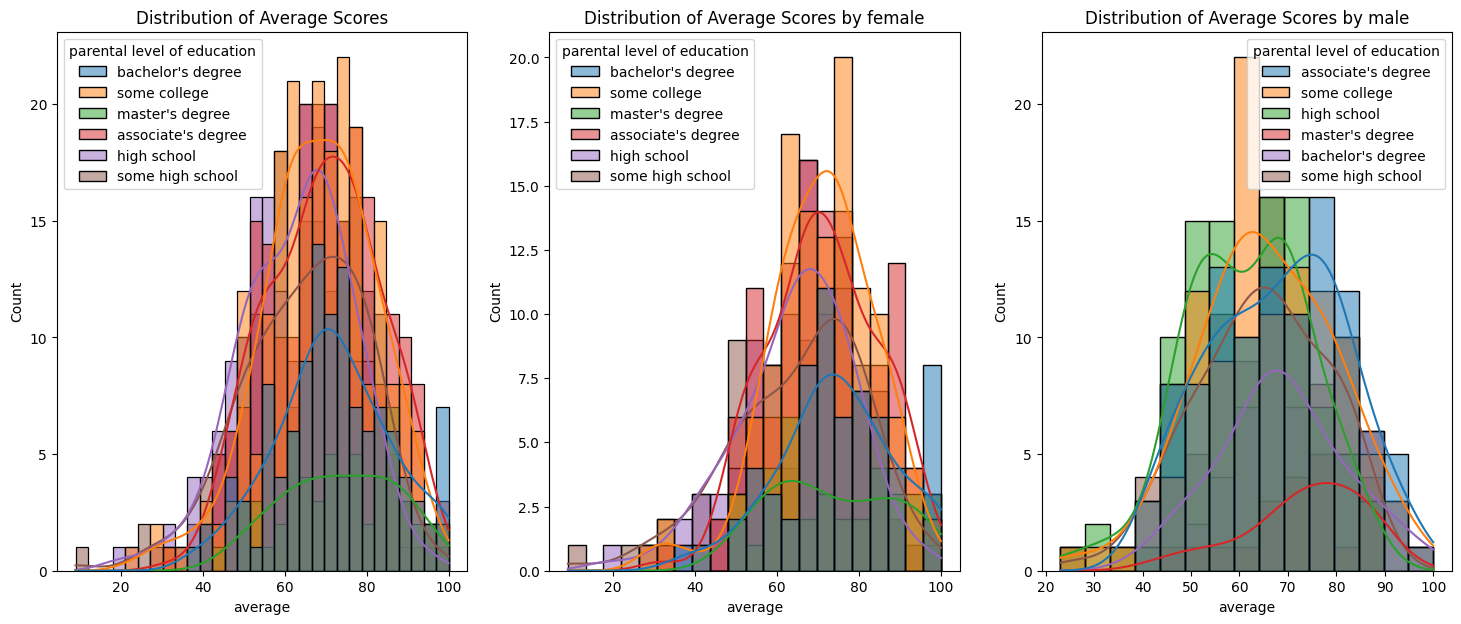

In [76]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

# First subplot
sns.histplot(data=df, x='average', bins=30, kde=True, color='g',hue='parental level of education', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Second subplot
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='parental level of education', ax=axs[1])
axs[1].set_title('Distribution of Average Scores by female')

sns.histplot(data=df[df['gender']=='male'], x='average', kde=True,hue='parental level of education', ax=axs[2])
axs[2].set_title('Distribution of Average Scores by male')
plt.show()


insights
- standard lunch helps to perform well in exam for both male and female
- there is not muxh effect of parental education on students but for  ale there is.

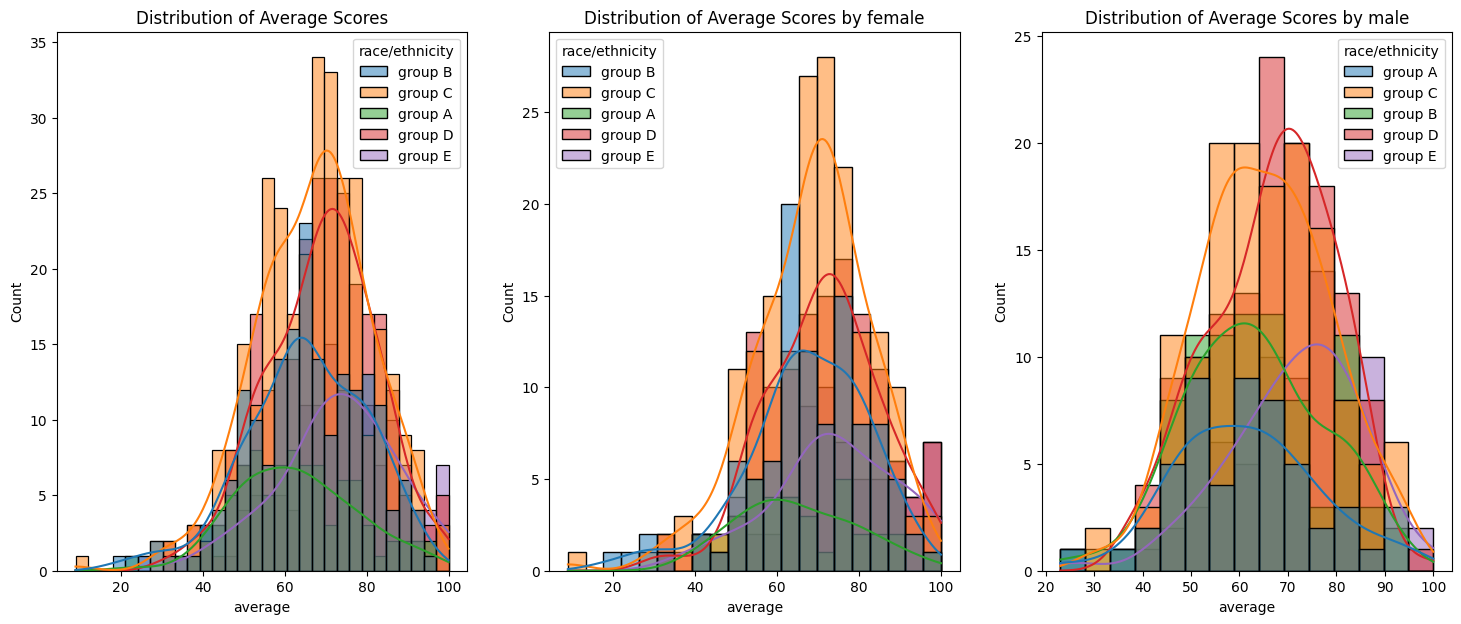

In [78]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

# First subplotn
sns.histplot(data=df, x='average', bins=30, kde=True, color='g',hue='race/ethnicity', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Second subplot
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='race/ethnicity', ax=axs[1])
axs[1].set_title('Distribution of Average Scores by female')

sns.histplot(data=df[df['gender']=='male'], x='average', kde=True,hue='race/ethnicity', ax=axs[2])
axs[2].set_title('Distribution of Average Scores by male')
plt.show()

insight
- Those Student belongs to Group A Are performing Very Poor in 
- Group C student performing verry good in exam



**4.2 Maximum score of student in all three subjects**

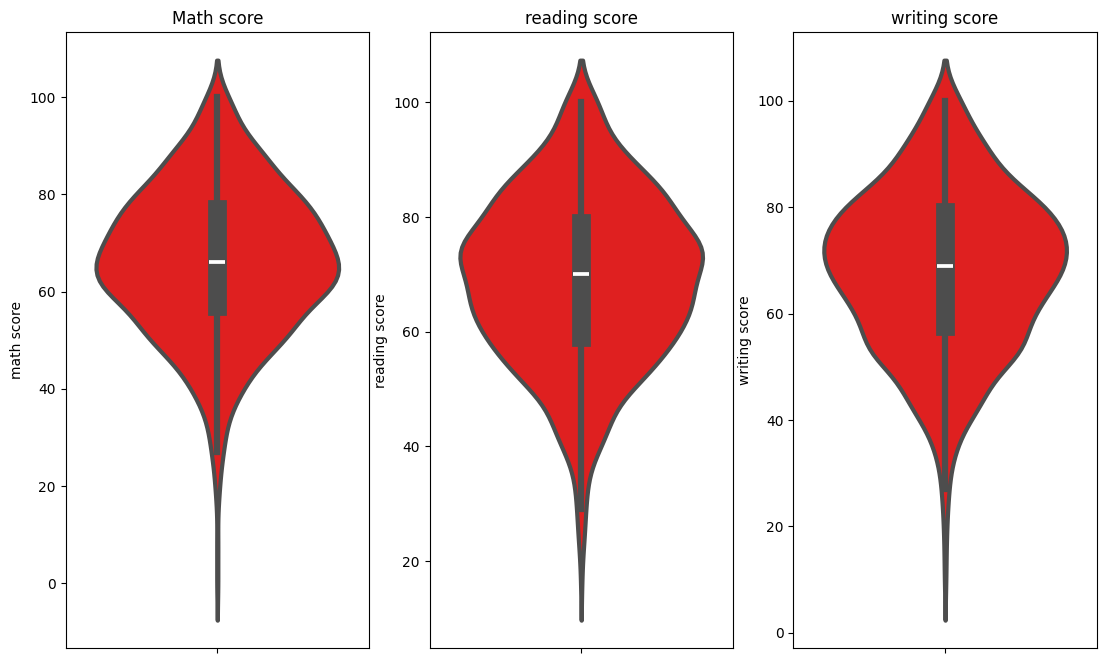

In [96]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math score")
sns.violinplot(y='math score',data=df,color= 'r',linewidth=3)
plt.subplot(1,4,2)
plt.title("reading score")
sns.violinplot(y='reading score',data=df,color= 'r',linewidth=3)
plt.subplot(1,4,3)
plt.title("writing score")
sns.violinplot(y='writing score',data=df,color= 'r',linewidth=3)
plt.show()

insights
- most of the student marks between 60-80 in maths
- for writing and reading most of the student between 50-80


4.3 **Multivariate analysis using pieplot**
**Multivariate Analysis**
- *Definition*: Multivariate analysis involves the analysis of more than two variables. It explores the interactions and relationships among multiple variables simultaneously.

- *Purpose*: To understand the complex relationships and patterns among multiple variables.

- *Techniques*:

- *Summary Statistics*: Multivariate correlation, regression coefficients.
- Visualizations: Pair plots, heatmaps, 3D scatter plots.
- Advanced Techniques: Principal Component Analysis (PCA), Cluster Analysis, Multivariate Regression.
- *Example*: Analyzing the relationship between students' math scores, reading scores, and their lunch type.

**Pair Plot**
- Let's use a pair plot to visualize the relationships among the numerical variables and use hue to color the plots by gender.m

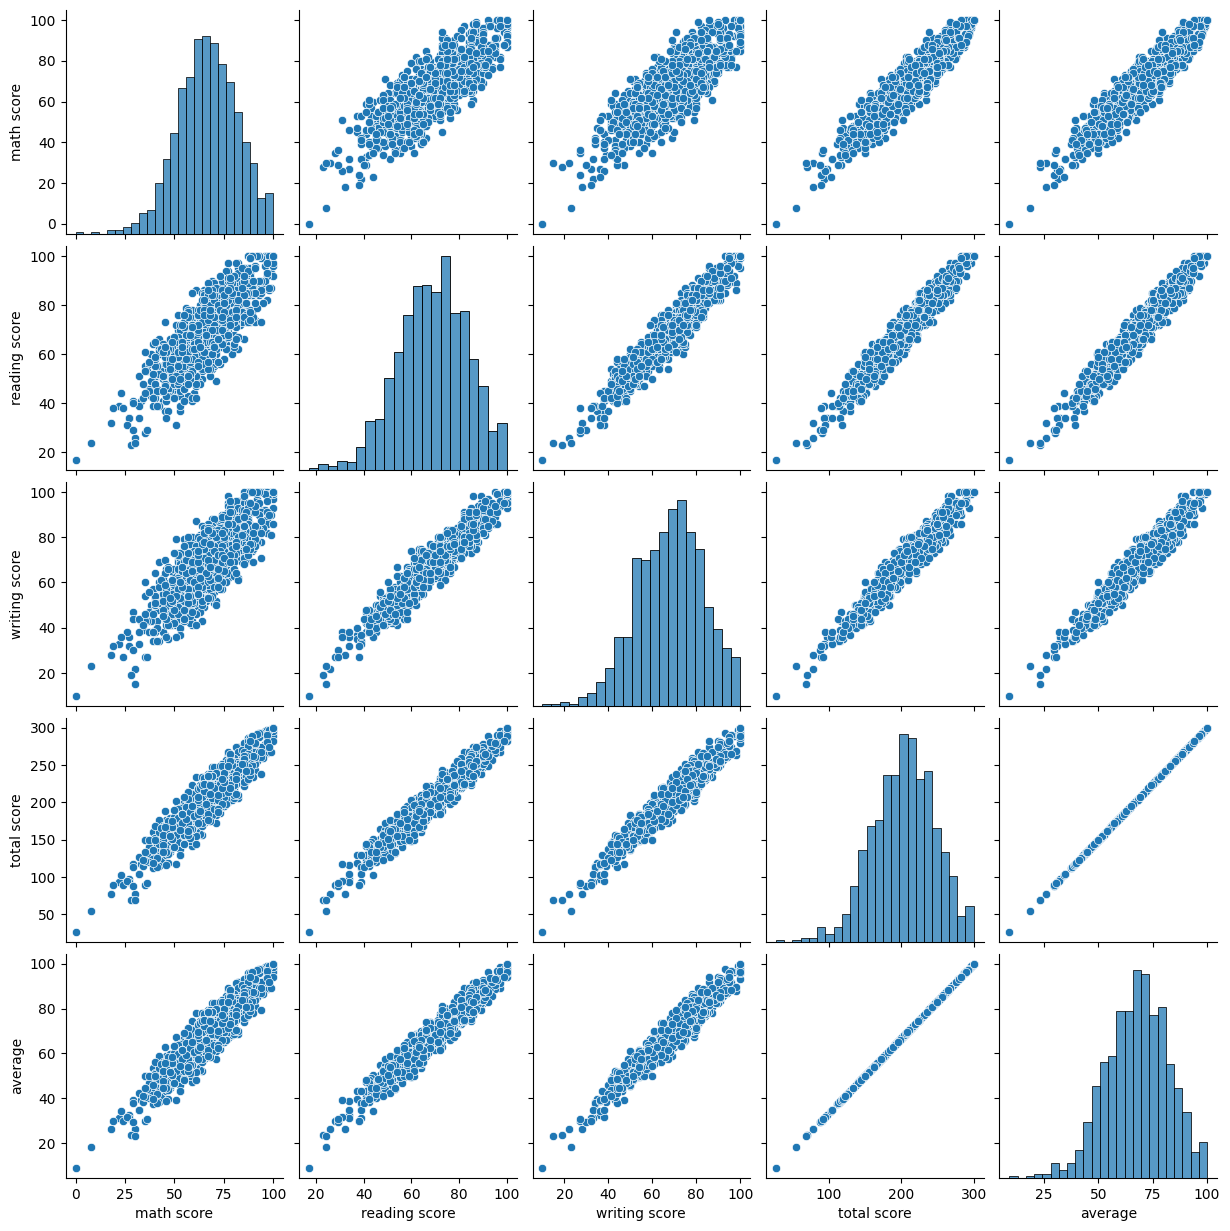

In [111]:
# Pair Plot for Numerical Variables
sns.pairplot(df[['math score', 'reading score', 'writing score', 'total score', 'average']])
plt.show()



**Heatmap of Correlations**
- A heatmap of the correlation matrix can show the relationships among the numerical variables.

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


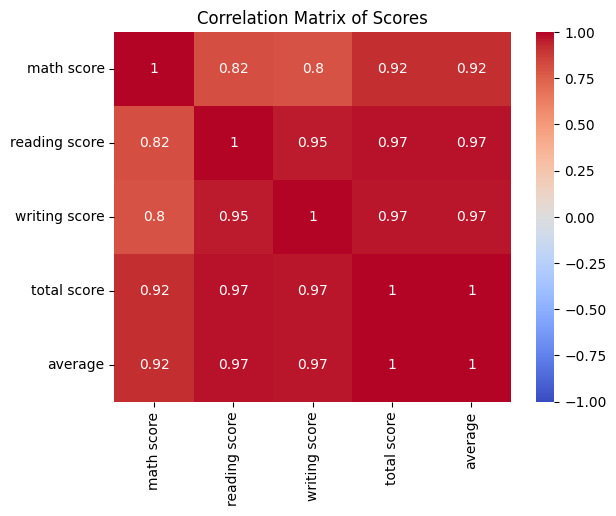

In [108]:
# Heatmap of Correlation Matrix
correlation_matrix = df[['math score', 'reading score', 'writing score', 'total score', 'average']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Scores')
plt.show()




**Box Plots for Categorical Variables**


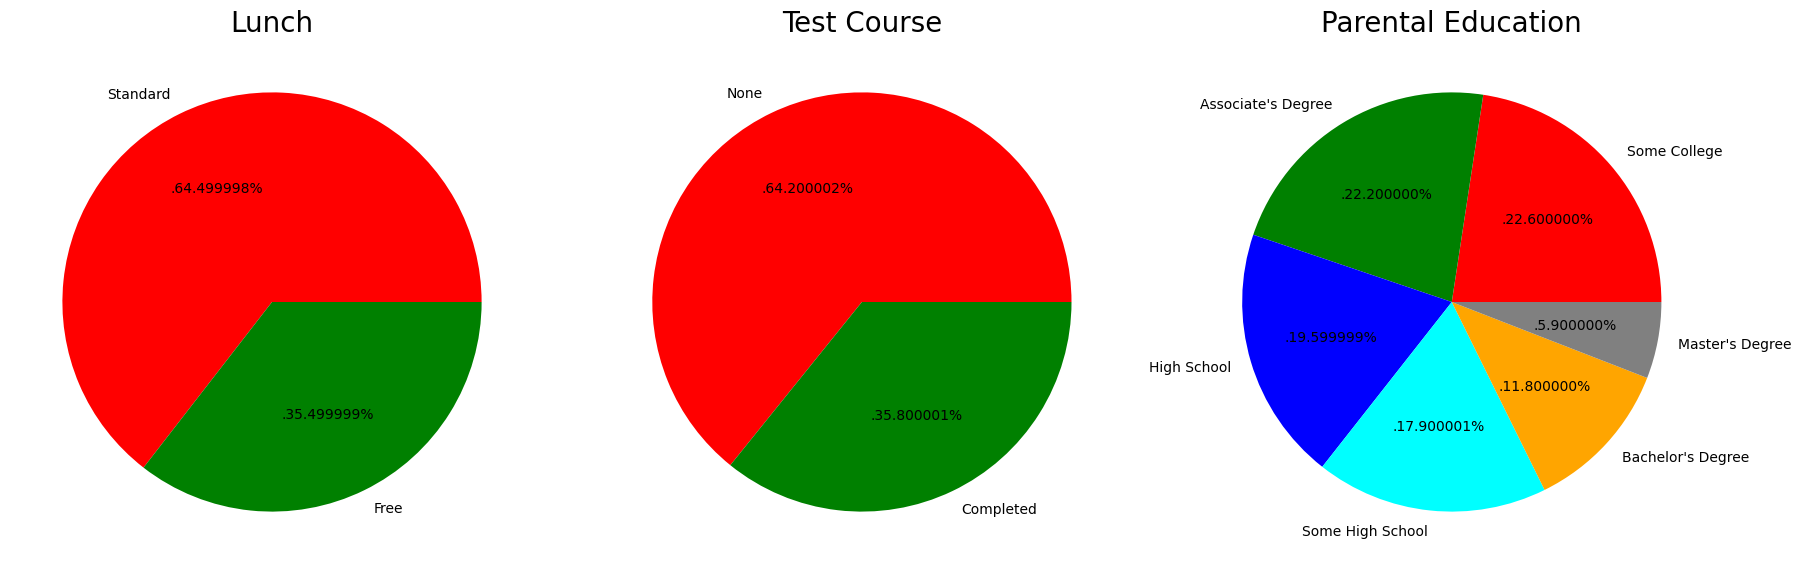

In [130]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


**Checking utliers**

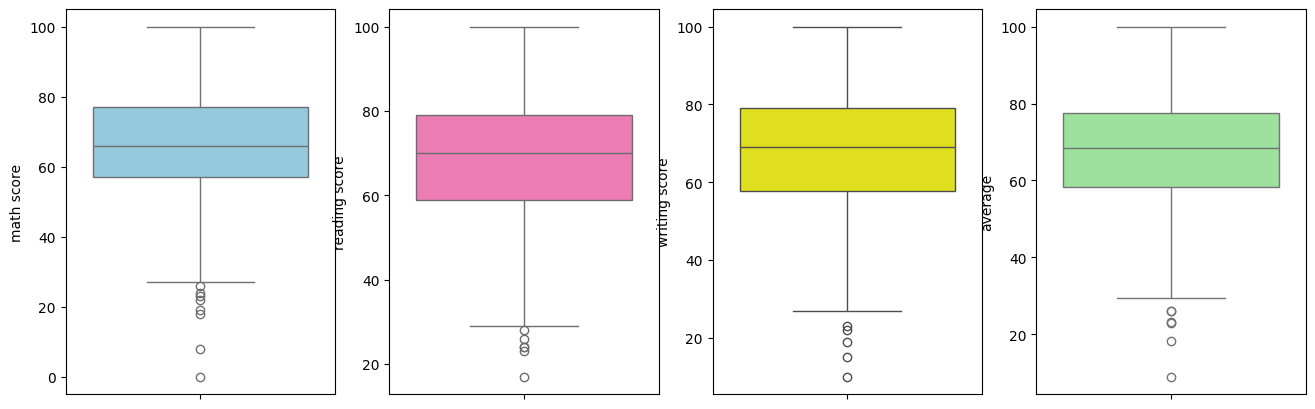

In [129]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

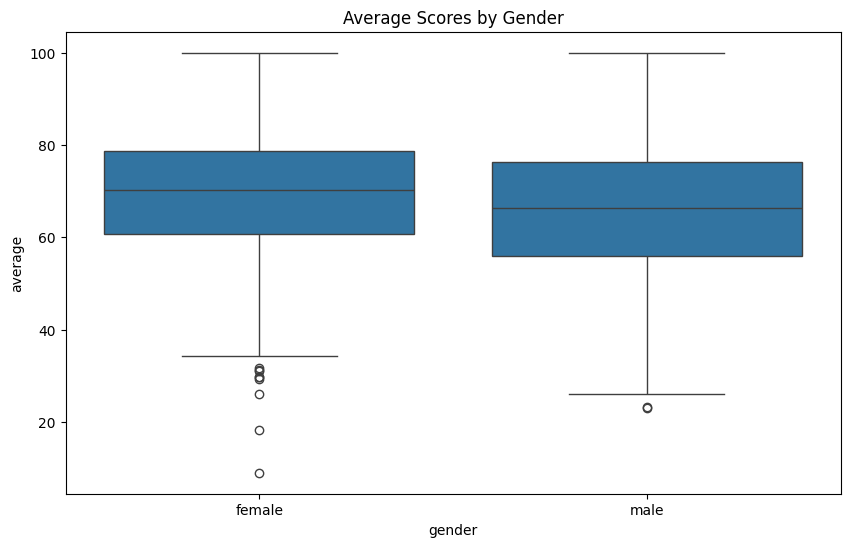

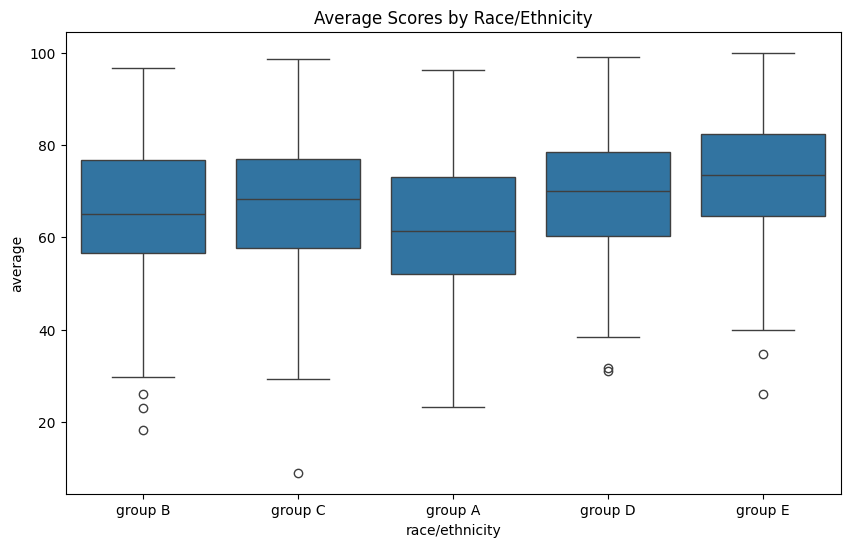

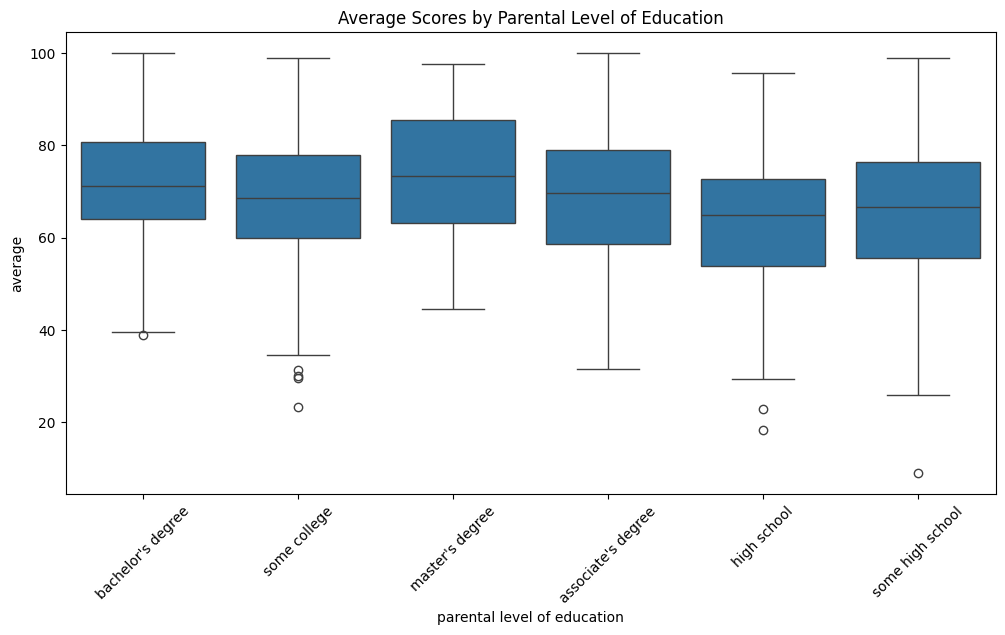

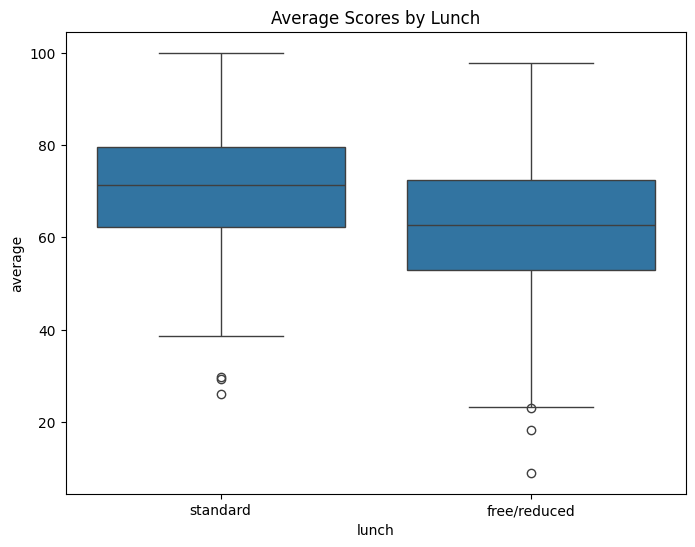

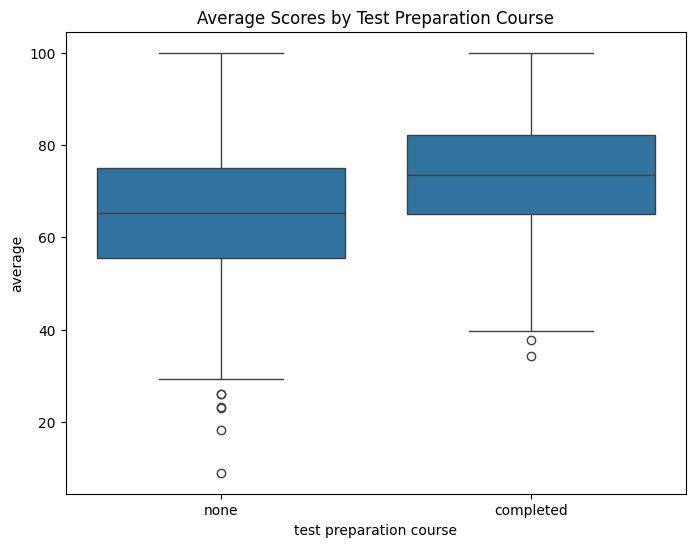

In [122]:


# Box Plot for Average Scores by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='average', data=df)
plt.title('Average Scores by Gender')
plt.show()

# Box Plot for Average Scores by Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='race/ethnicity', y='average', data=df)
plt.title('Average Scores by Race/Ethnicity')
plt.show()

# Box Plot for Average Scores by Parental Level of Education
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='average', data=df)
plt.title('Average Scores by Parental Level of Education')
plt.xticks(rotation=45)
plt.show()

# Box Plot for Average Scores by Lunch
plt.figure(figsize=(8, 6))
sns.boxplot(x='lunch', y='average', data=df)
plt.title('Average Scores by Lunch')
plt.show()

# Box Plot for Average Scores by Test Preparation Course
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course', y='average', data=df)
plt.title('Average Scores by Test Preparation Course')
plt.show()


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


**Bivariate analysis**
- involves examining the relationship between two variables simultaneously. Given your dataset, which includes both categorical and numerical variables, you can perform various types of bivariate analysis to explore how pairs of variables interact. Here are a few examples using seaborn and matplotlib:

 **Scatter Plot**
- A scatter plot is useful for visualizing the relationship between two numerical variables.

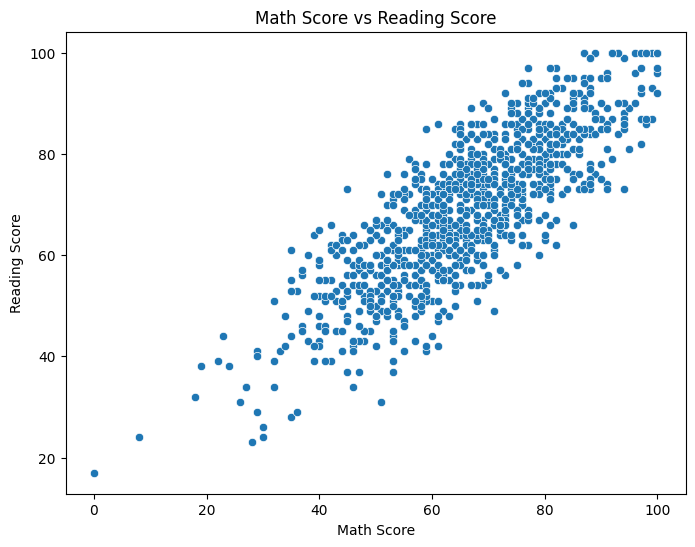

In [112]:
# Scatter plot of Math Score vs Reading Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='reading score', data=df)
plt.title('Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

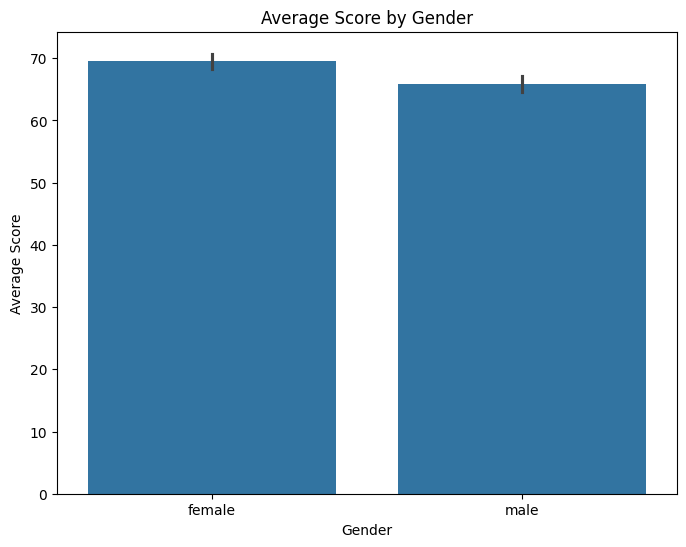

In [113]:
# Bar plot of Average Score by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='average', data=df)
plt.title('Average Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.show()


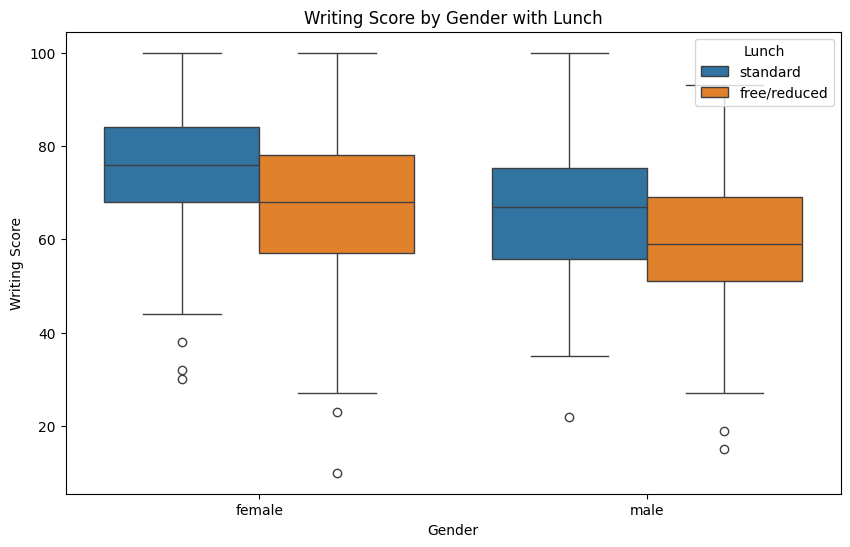

In [114]:
# Box plot of Writing Score by Gender with Hue of Lunch
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='writing score', hue='lunch', data=df)
plt.title('Writing Score by Gender with Lunch')
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.legend(title='Lunch', loc='upper right')
plt.show()


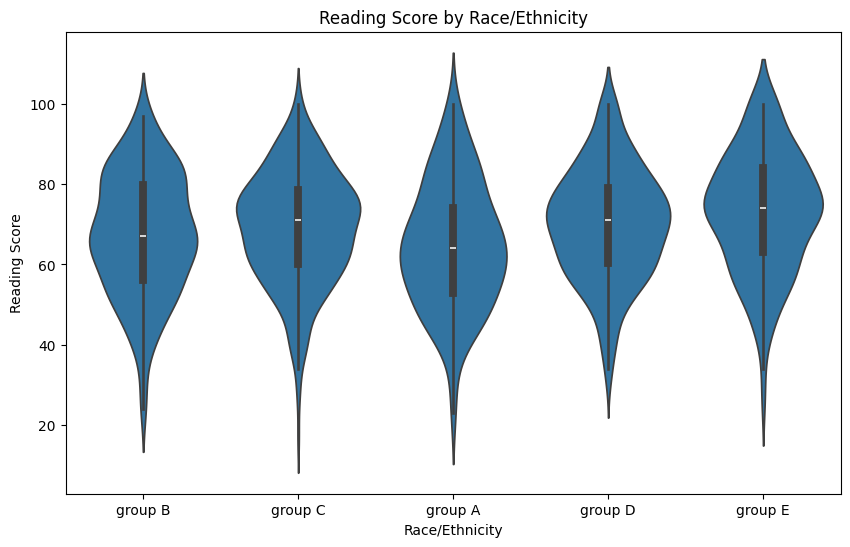

In [115]:
# Violin plot of Reading Score by Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.violinplot(x='race/ethnicity', y='reading score', data=df)
plt.title('Reading Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Reading Score')
plt.show()


**Univariate analysis**
- focuses on examining the distribution and characteristics of a single variable at a time. Given your dataset, which includes both categorical and numerical variables, you can perform various types of univariate analysis using seaborn and matplotlib to understand the distribution and summary statistics of each variable. Here are some examples:

**Explanation**
- *Histogram*: Visualizes the distribution of a numerical variable (math score) using bins and a density estimate.
- *Count Plot*: Shows the count of observations in each category of a categorical variable (gender).
- *Box Plot*: Displays the distribution of numerical data (reading score) based on key statistical measures.
- *Pie Chart*: Represents the distribution of categories in a categorical variable (lunch) as proportions.
- *KDE Plot*: Illustrates the distribution of a numerical variable (writing score) using a smoothed density estimate.

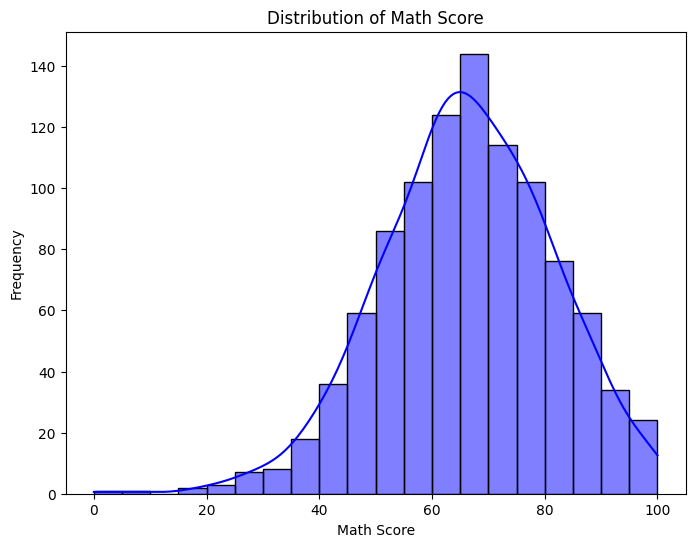

In [117]:
# Histogram of Math Score
plt.figure(figsize=(8, 6))
sns.histplot(df['math score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

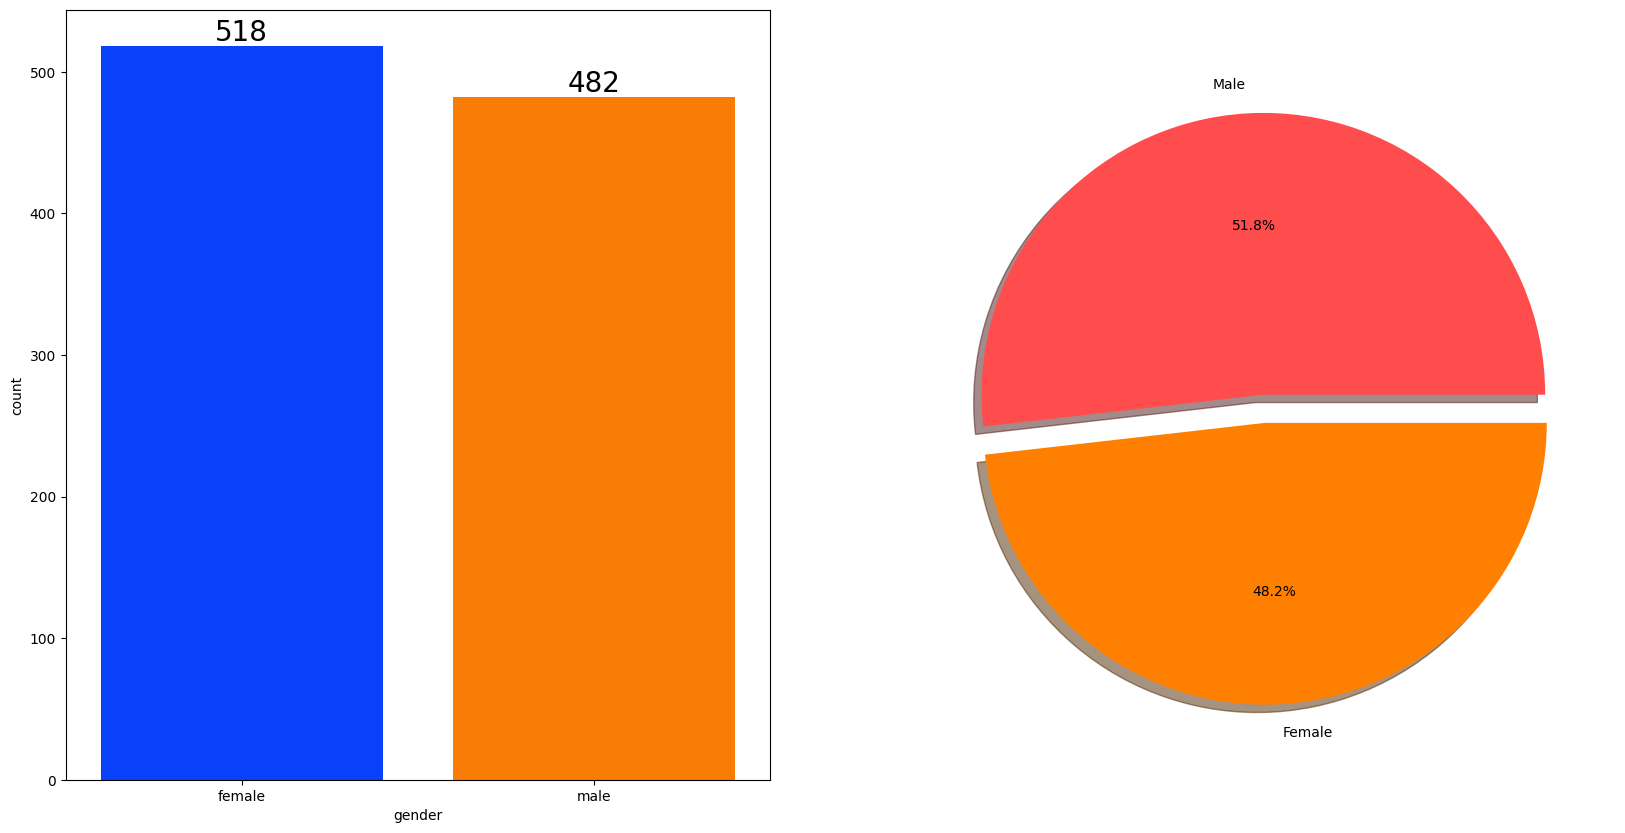

In [126]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

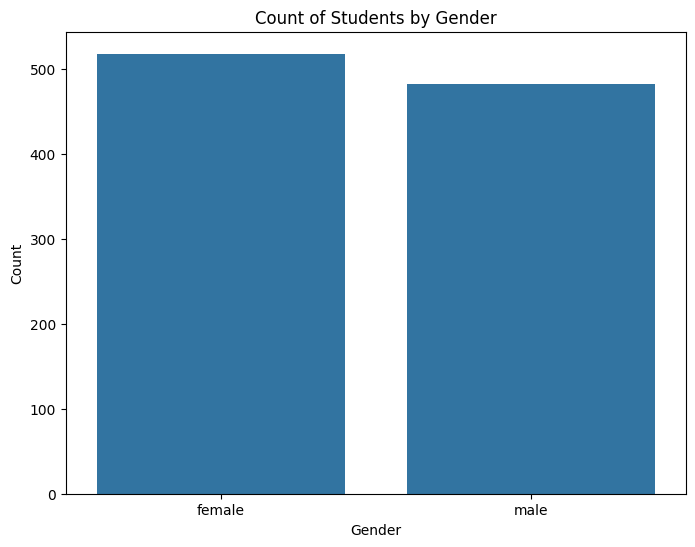

In [118]:
# Count plot of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Count of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


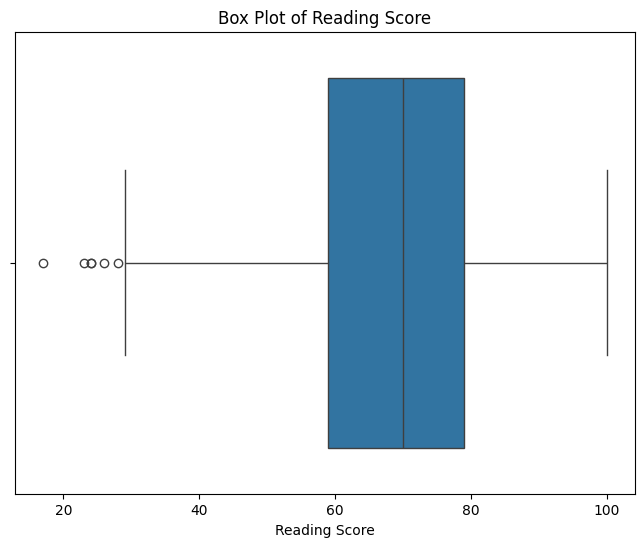

In [119]:
# Box plot of Reading Score
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['reading score'])
plt.title('Box Plot of Reading Score')
plt.xlabel('Reading Score')
plt.show()


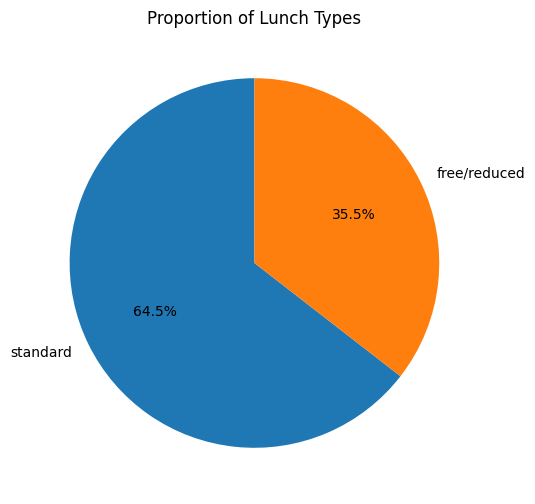

In [120]:
# Pie chart of Lunch
plt.figure(figsize=(8, 6))
df['lunch'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Lunch Types')
plt.ylabel('')
plt.show()


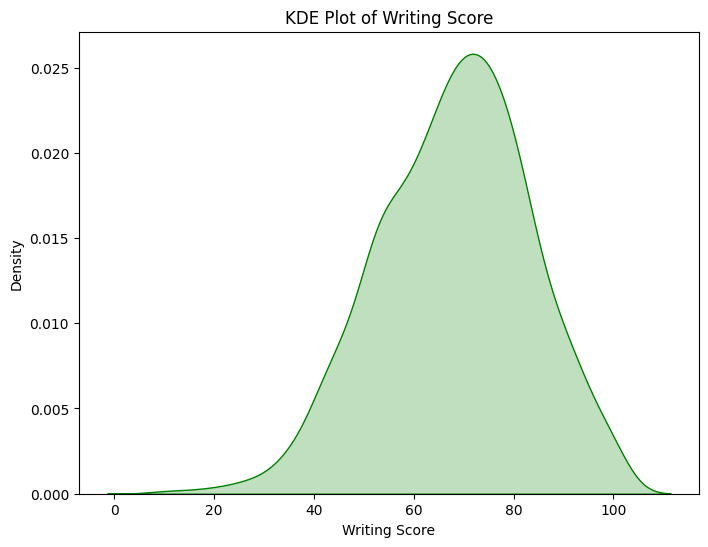

In [121]:
# KDE plot of Writing Score
plt.figure(figsize=(8, 6))
sns.kdeplot(df['writing score'], shade=True, color='green', cumulative=False)
plt.title('KDE Plot of Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Density')
plt.show()


#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

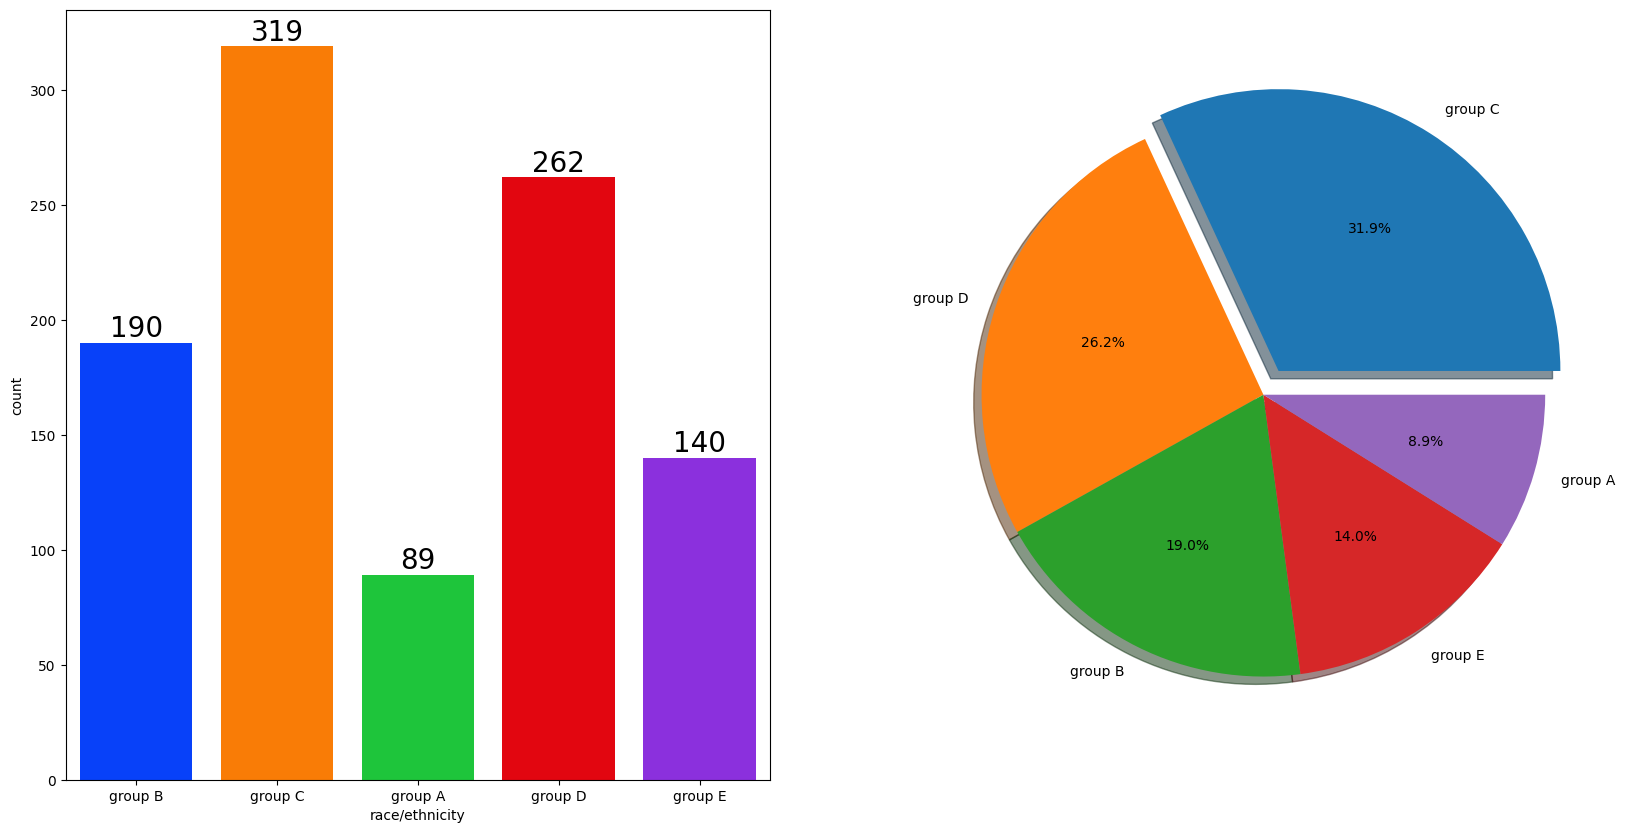

In [132]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.